In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

## No need to run

In [5]:
tle_path='../TLE/all_by_id_latest/'
starttime=datetime.strptime("2022-4-1 0:0:0","%Y-%m-%d %H:%M:%S")
endtime=datetime.strptime("2022-7-20 0:0:0","%Y-%m-%d %H:%M:%S")

In [ ]:
g = os.walk(tle_path)  
df_list=[]
for path,dir_list,file_list in g:  
    for file in tqdm(file_list):
        temp=pd.read_csv(path+file)
        temp['EPOCH']=temp['EPOCH'].astype('datetime64[ns]')
        temp=temp[(temp['EPOCH']>=starttime)&(temp['EPOCH']<=endtime)]
        if temp.shape[0]>0:
            df_list.append(temp)
tle=pd.concat(df_list)
del df_list
data=pd.DataFrame(columns=tle.columns)
for satid in tqdm(tle['NORAD_CAT_ID'].unique()):
    temp_df=tle[tle['NORAD_CAT_ID']==satid]
    temp_df=temp_df.sort_values(by='EPOCH')
    data=data.append(temp_df.loc[temp_df.index[-1]])
data['height']=data.apply(lambda x:x['SEMIMAJOR_AXIS']-6378.135,axis=1)
data.to_csv('latest_tle.csv')

### Start from this line

In [2]:
data=pd.read_csv('../figure4/data/latest_tle.csv')

In [3]:
all=[]
debris=[]
starlinks=[]
rocket=[]
payloads=[]
unknown=[]

for h in range(200,1301,1):
    temp_df=data[((data['height']>=h)&(data['height']<h+1))]
    all.append(temp_df.shape[0])
    debris.append(temp_df[temp_df['OBJECT_TYPE']=='DEBRIS'].shape[0])
    starlinks.append(temp_df[temp_df['OBJECT_NAME'].str.contains('STARLINK')].shape[0])
    rocket.append(temp_df[temp_df['OBJECT_TYPE']=='ROCKET BODY'].shape[0])
    payloads.append(temp_df[temp_df['OBJECT_TYPE']=='PAYLOAD'].shape[0])
    unknown.append(temp_df[temp_df['OBJECT_TYPE']=='UNKNOWN'].shape[0])
    
    

## Figure 8a Space objects in our dataset 类别分布图

Text(0, 0.5, 'Number')

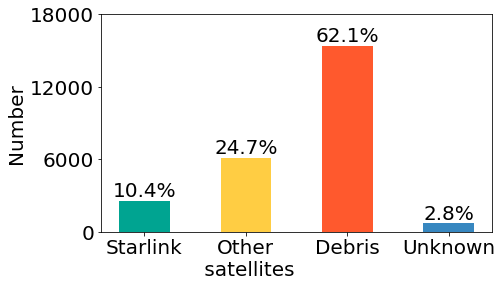

In [4]:
type_num={}
type_num['Starlink']=data[data['OBJECT_NAME'].str.contains('STARLINK')].shape[0]
type_num['Other\n satellites']=data[data['OBJECT_TYPE']=='PAYLOAD'].shape[0]-type_num['Starlink']
type_num['Debris']=data[data['OBJECT_TYPE']=='DEBRIS'].shape[0]+data[data['OBJECT_TYPE']=='ROCKET BODY'].shape[0]
# type_num['Rocket\n body']=data[data['OBJECT_TYPE']=='ROCKET BODY'].shape[0]
type_num['Unknown']=data[data['OBJECT_TYPE']=='UNKNOWN'].shape[0]

fs=20
fig=plt.figure(figsize=(7,4))
# x=[5,10,15,20,25]
x=[5,10,15,20]
color=["#00A491","#FFCD43","#FF592D","#3787C0","#8E55A5"]
# color=["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]
plt.subplots_adjust(wspace =0.1, hspace =0.3)#调整子图间距
# plt.subplot(1,2,1)
plt.bar(x,type_num.values(),color=color,width=2.5)
for a,b in zip(x,type_num.values()):
    plt.text(a, b+0.05, str(round((b/sum(type_num.values()))*100,1))+"%", ha='center', va= 'bottom',fontsize=fs)
plt.xticks(x,type_num.keys(),fontsize=fs)
plt.yticks(range(0,18001,6000),range(0,18001,6000),fontsize=fs)
# plt.ticklabel_format( axis='y', scilimits=(0,0))
plt.ylim(0,18000)
# plt.xlabel("Object type",fontsize=19)
plt.ylabel("Number",fontsize=fs)
# plt.subplot(1,4,3)
# plt.pie(type_num.values(),colors=color,autopct="%0.1f%%",wedgeprops = {'width':0.4,'edgecolor':'white', 'linewidth':1},startangle=0,pctdistance=1.25)
# plt.title("Proportion")
# plt.tight_layout()
#plt.savefig("./figure8a.pdf",bbox_inches='tight')